In [1]:
#import Related libraries to task
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [2]:
#import Iris DataSet
data=pd.read_csv('Iris.csv')

In [3]:
#print data only 5 dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#generate discriptive statistics
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info() #dataset all information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


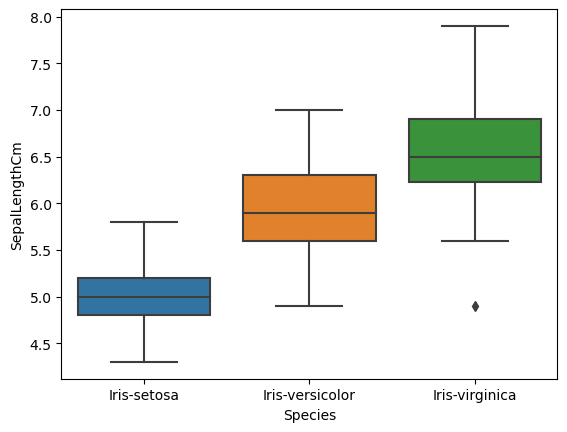

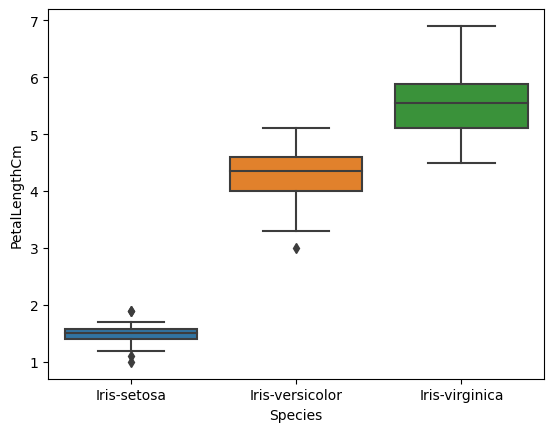

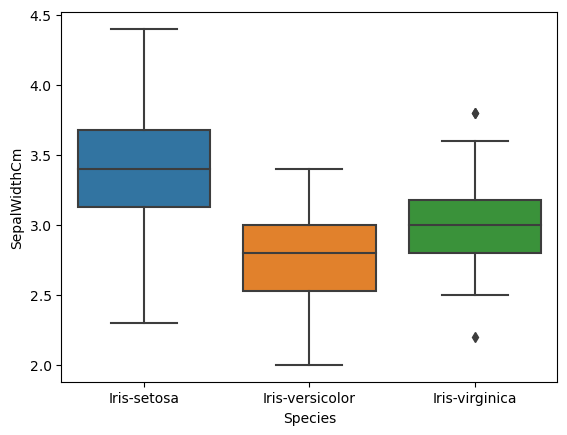

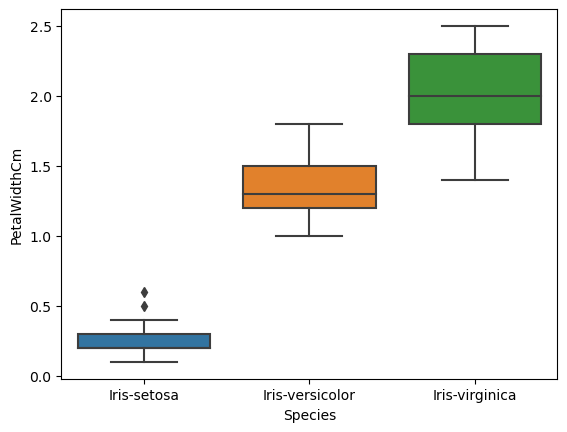

In [6]:
sns.boxplot(x='Species',y='SepalLengthCm',data=data) #boxplot to visualize dataset
plt.show()
sns.boxplot(x='Species',y='PetalLengthCm',data=data)
plt.show()
sns.boxplot(x='Species',y='SepalWidthCm',data=data)
plt.show()
sns.boxplot(x='Species',y='PetalWidthCm',data=data)
plt.show()

In [9]:
#split the data into train and test set
#train=70% and test=30%
train,test = train_test_split(data,test_size=0.30)

In [10]:
#train_data
train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
10,11,5.4,3.7,1.5,0.2,Iris-setosa
35,36,5.0,3.2,1.2,0.2,Iris-setosa
141,142,6.9,3.1,5.1,2.3,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
...,...,...,...,...,...,...
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-virginica
29,30,4.7,3.2,1.6,0.2,Iris-setosa
70,71,5.9,3.2,4.8,1.8,Iris-versicolor


In [11]:
#test_data
test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
7,8,5.0,3.4,1.5,0.2,Iris-setosa
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
30,31,4.8,3.1,1.6,0.2,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
127,128,6.1,3.0,4.9,1.8,Iris-virginica
84,85,5.4,3.0,4.5,1.5,Iris-versicolor


In [12]:
#split the features and targets
train_x=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species

test_x=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=train.Species

In [13]:
#fetures of train_data
train_x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,5.4,3.7,1.5,0.2
35,5.0,3.2,1.2,0.2
141,6.9,3.1,5.1,2.3
135,7.7,3.0,6.1,2.3
57,4.9,2.4,3.3,1.0
...,...,...,...,...
76,6.8,2.8,4.8,1.4
149,5.9,3.0,5.1,1.8
29,4.7,3.2,1.6,0.2
70,5.9,3.2,4.8,1.8


In [14]:
#targets of train_data
train_y

10         Iris-setosa
35         Iris-setosa
141     Iris-virginica
135     Iris-virginica
57     Iris-versicolor
            ...       
76     Iris-versicolor
149     Iris-virginica
29         Iris-setosa
70     Iris-versicolor
13         Iris-setosa
Name: Species, Length: 105, dtype: object

In [15]:
#features of test_data
test_x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,5.4,3.7,1.5,0.2
35,5.0,3.2,1.2,0.2
141,6.9,3.1,5.1,2.3
135,7.7,3.0,6.1,2.3
57,4.9,2.4,3.3,1.0
...,...,...,...,...
76,6.8,2.8,4.8,1.4
149,5.9,3.0,5.1,1.8
29,4.7,3.2,1.6,0.2
70,5.9,3.2,4.8,1.8


In [16]:
#features of test_data
test_y

10         Iris-setosa
35         Iris-setosa
141     Iris-virginica
135     Iris-virginica
57     Iris-versicolor
            ...       
76     Iris-versicolor
149     Iris-virginica
29         Iris-setosa
70     Iris-versicolor
13         Iris-setosa
Name: Species, Length: 105, dtype: object

In [17]:
#Train model using vector_method
model=svm.SVC()
model.fit(train_x,train_y)

SVC()

In [20]:
#predict data
predct=model.predict(test_x)

In [21]:
#compare train and test
metrics.accuracy_score(predct,test_y)

0.9714285714285714

In [22]:
#Test the model
test=np.array([[4,3,2,5]])
iris_name=model.predict(test)
print(iris_name)

['Iris-versicolor']


C:\Users\acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
